<a href="https://colab.research.google.com/github/bhuvighosh3/ML-Compute/blob/main/Logistic_Regression_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/Ad Click Data.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [ ]:
len(pd.unique(df['Country']))

238

In [ ]:
len(pd.unique(df['City']))

969

In [ ]:
len(pd.unique(df['Timestamp']))

997

In [ ]:
len(pd.unique(df['Ad Topic Line']))

1000

In [ ]:
df.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Ad Topic Line                0
City                         1
Male                         3
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64

In [ ]:
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].median(),inplace=True)
df['Area Income'].fillna(df['Area Income'].median(),inplace=True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].median(),inplace=True)
df['City'].fillna(df['City'].mode()[0],inplace=True)
df['Country'].fillna(df['Country'].mode()[0],inplace=True)
df['Male'].fillna(df['Male'].mode()[0],inplace=True)

Filling the null values with median(For numerical columns) & with mode for categorical columns.

In [ ]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

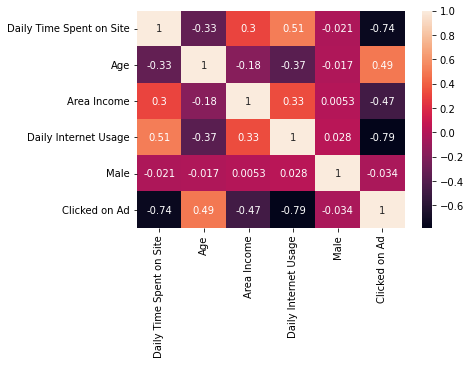

In [ ]:
sns.heatmap(df.corr(),annot=True)

Daily Internet Usage & Daily Time Spent on Site have a high positive correlation. Hence, one of these can be dropped.

In [ ]:
df1=df[['Age','Area Income','Daily Internet Usage','Clicked on Ad']]

Considering only the target column & the numerical columns.

In [ ]:
df1.isnull().sum()

Age                     0
Area Income             0
Daily Internet Usage    0
Clicked on Ad           0
dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   1000 non-null   int64  
 1   Area Income           1000 non-null   float64
 2   Daily Internet Usage  1000 non-null   float64
 3   Clicked on Ad         1000 non-null   int64  
dtypes: float64(2), int64(2)
memory usage: 31.4 KB


Text(0.5, 0, 'Area Income')

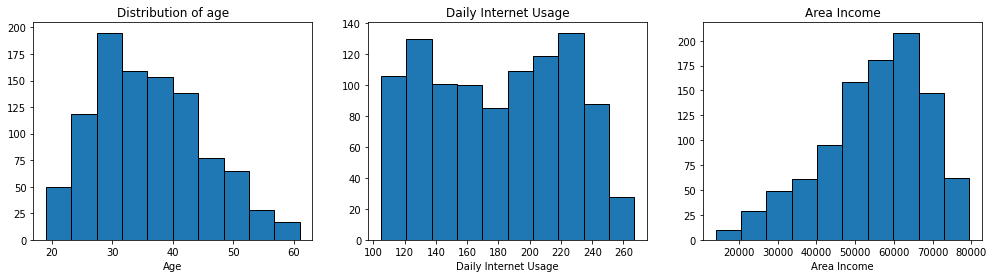

In [ ]:
plt.figure(figsize=(17,4))
plt.subplot(1,3,1)
plt.hist(df1['Age'],edgecolor='black',bins=10)
plt.title('Distribution of age')
plt.xlabel('Age')
plt.subplot(1,3,2)
plt.hist(df1['Daily Internet Usage'], edgecolor='black',bins=10)
plt.title('Daily Internet Usage')
plt.xlabel('Daily Internet Usage')
plt.subplot(1,3,3)
plt.hist(df1['Area Income'], edgecolor='black',bins=10)
plt.title('Area Income')
plt.xlabel('Area Income')

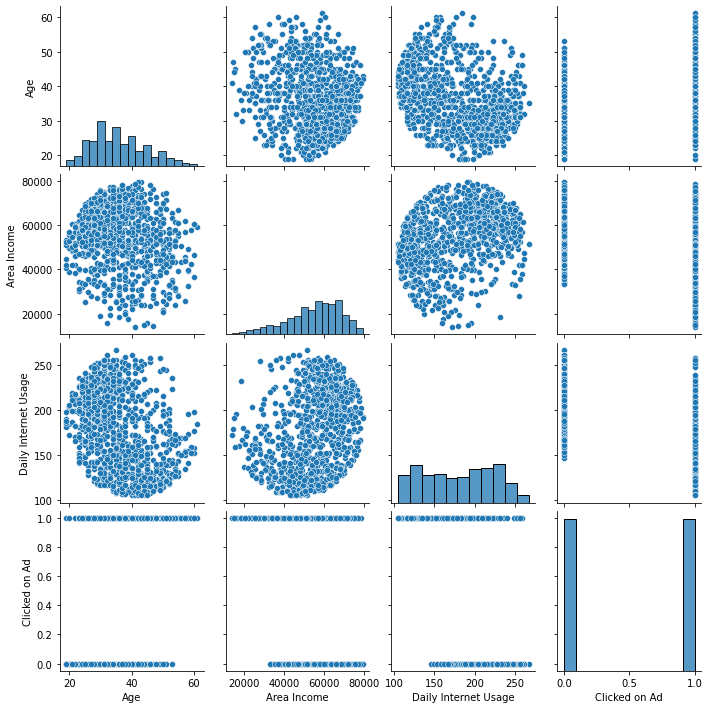

In [ ]:
sns.pairplot(df1)

In [ ]:
x=df1.iloc[:,0:3].values
y=df1.iloc[:,3].values
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=10)

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=10)
model.fit(x_train,y_train)

LogisticRegression(random_state=10)

In [ ]:
model.intercept_

array([0.00390152])

In [ ]:
model.coef_

array([[ 2.42772480e-01, -3.16659440e-05, -3.80448953e-02]])

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0])

In [ ]:
model.score(x_test,y_test)

0.8866666666666667

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[135,  11],
       [ 23, 131]])